In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [183]:
#importing the  Train data
from google.colab import files
uploaded=files.upload()

Saving Titanic_train.csv to Titanic_train (3).csv


In [184]:
df1=pd.read_csv('Titanic_train.csv')

In [185]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [186]:
# Importing the Test data
from google.colab import files
uploaded=files.upload()


Saving Titanic_test.csv to Titanic_test (3).csv


In [187]:
df2=pd.read_csv('Titanic_test.csv')

In [188]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [189]:
# Concating the two datasets
df=pd.concat([df1,df2],axis=0)

In [190]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [191]:
# Convertng the Survived column float to int
df['Survived'].fillna(0,inplace=True)

In [192]:
df['Survived']=df['Survived'].astype(int)

In [193]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [194]:
# Basic Analysis
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
df.shape

(1309, 12)

In [196]:
df.size

15708

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [198]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.261268,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.439494,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [199]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [200]:
# Checking the datatypes of  columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [201]:
# Checking the data having null values
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [213]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [215]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [216]:
df.duplicated().sum()

0

In [217]:
# Visualizations

<Axes: >

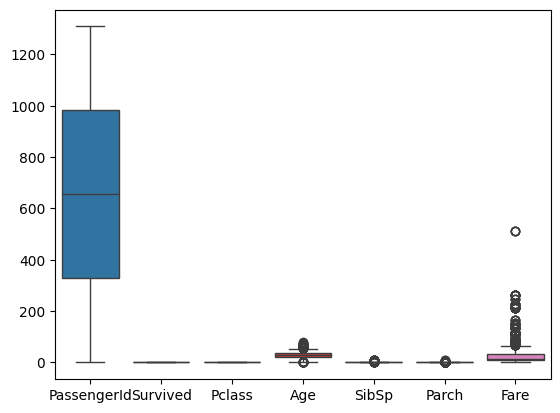

In [219]:
sns.boxplot(df)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

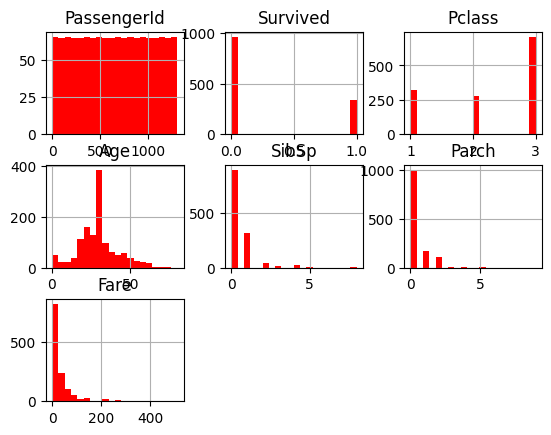

In [220]:
df.hist(bins=20,color='red')

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

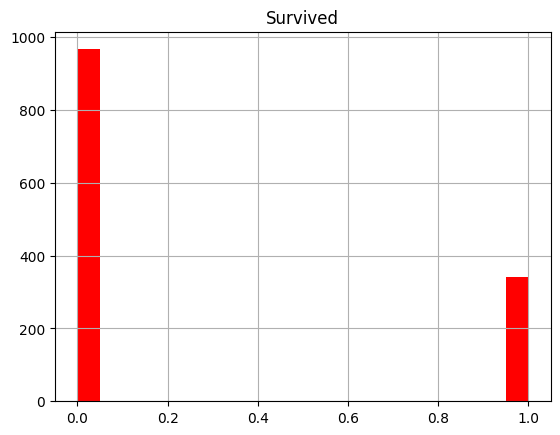

In [221]:
df.hist(['Survived','Sex'],bins=20,color='red')

<Axes: >

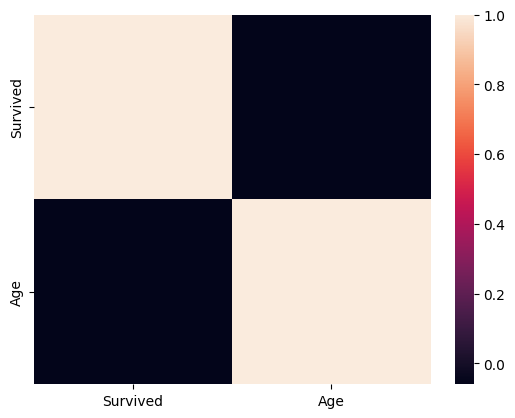

In [222]:
sns.heatmap(df[['Survived','Age']].corr())

<Axes: >

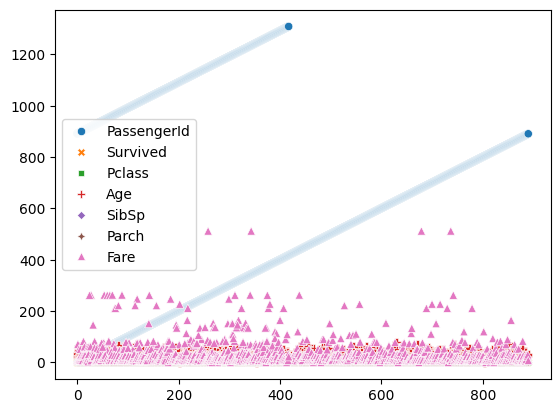

In [223]:
sns.scatterplot(df)

<Axes: ylabel='Sex'>

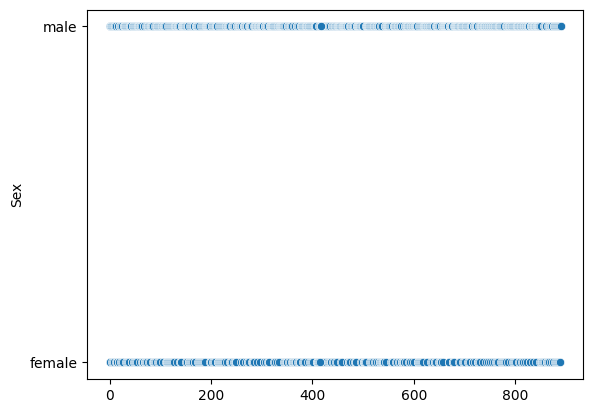

In [224]:
sns.scatterplot(df['Sex'])

<Axes: xlabel='Survived', ylabel='count'>

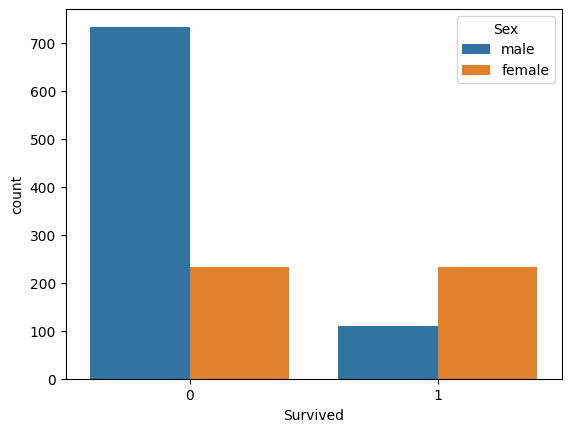

In [225]:
sns.countplot(x='Survived',data=df,hue='Sex')

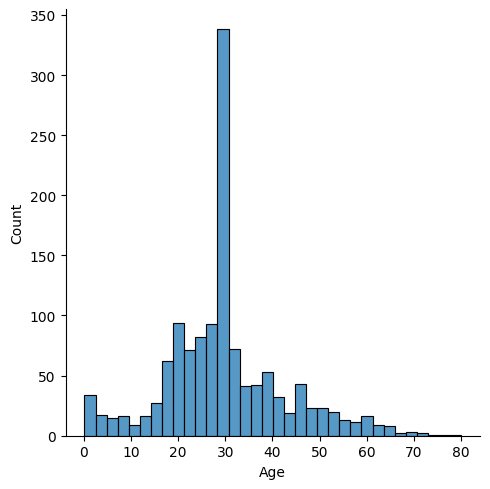

In [226]:
sns.displot(df['Age'])

In [227]:
# Deleting unnessasry columns
df.drop(['Name','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [228]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.000000,1,0,S
1,2,1,1,female,38.000000,1,0,C
2,3,1,3,female,26.000000,0,0,S
3,4,1,1,female,35.000000,1,0,S
4,5,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...,...
413,1305,0,3,male,29.881138,0,0,S
414,1306,0,1,female,39.000000,0,0,C
415,1307,0,3,male,38.500000,0,0,S
416,1308,0,3,male,29.881138,0,0,S


In [229]:
# Converting the Categorical data into numerical data using LabelEncoder
lab_encoder=LabelEncoder()

In [230]:
df['Sex']=lab_encoder.fit_transform(df['Sex'])

In [231]:
df.Embarked.value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [235]:
data=pd.get_dummies(df,dtype='int')

In [236]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.000000,1,0,0,0,1
1,2,1,1,0,38.000000,1,0,1,0,0
2,3,1,3,0,26.000000,0,0,0,0,1
3,4,1,1,0,35.000000,1,0,0,0,1
4,5,0,3,1,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,29.881138,0,0,0,0,1
414,1306,0,1,0,39.000000,0,0,1,0,0
415,1307,0,3,1,38.500000,0,0,0,0,1
416,1308,0,3,1,29.881138,0,0,0,0,1


In [237]:
target=data[['Survived']]
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
413,0
414,0
415,0
416,0


In [238]:
features=data.drop('Survived',axis=1)
features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.000000,1,0,0,0,1
1,2,1,0,38.000000,1,0,1,0,0
2,3,3,0,26.000000,0,0,0,0,1
3,4,1,0,35.000000,1,0,0,0,1
4,5,3,1,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,29.881138,0,0,0,0,1
414,1306,1,0,39.000000,0,0,1,0,0
415,1307,3,1,38.500000,0,0,0,0,1
416,1308,3,1,29.881138,0,0,0,0,1


In [240]:
print(df.shape)
print(data.shape)

(1309, 8)
(1309, 10)


In [241]:
print(target.shape)
print(features.shape)

(1309, 1)
(1309, 9)


In [242]:
print(data.isnull().sum())
print(data.duplicated().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64
0


In [245]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.8,random_state=100)

In [246]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1047, 9)
(1047, 1)
(262, 9)
(262, 1)


In [47]:
# XGBM

In [247]:
xg_boost=xgb.XGBClassifier(n_estimators=60,learning_rate=0.01,max_depth=2,subsample=0.9,min_child_weight=2)

In [248]:
xg_boost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=60, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [251]:
y_predict = xg_boost.predict(x_test)

In [252]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [253]:
accuracy_score(y_test,y_predict)

0.7366412213740458

In [254]:
# Gridsearch

In [255]:
params={'n_estimators':[40,50,60,70,80],'learning_rate':[0.01,0.02,0.03,0.04],'max_depth':[2,3,4],'subsample':[0.6,0.7,0.8,0.9],'min_child_weight':[1,2,3,4]}

In [264]:
grid_search=GridSearchCV(xg_boost,params,verbose=0)

In [265]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.04, max_b...
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=80,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [2, 3, 4],
                         'min_child_weight': [1, 2, 3, 4],
                         'n_estimators': [40, 50, 60, 70, 80],
                         'subsample': [0.6, 0.7, 0.8, 0.9]})

In [259]:
grid_search.best_params_

{'learning_rate': 0.04,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 80,
 'subsample': 0.8}

In [260]:
xg_boost=XGBClassifier(n_estimators=80,learning_rate=0.04,max_depth=3,subsample=0.8,min_child_weight=3)

In [261]:
xg_boost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [262]:
y_pred=xg_boost.predict(x_test)

In [263]:
accuracy_score(y_test,y_pred)

0.8893129770992366

In [266]:
# LGBM

In [267]:
!pip install lightgbm

In [280]:
import lightgbm as lgb
from lightgbm import Dataset

In [283]:
data=lgb.Dataset(target,features)

In [285]:
data

In [286]:
params={}
params['learning_rate']=0.1
params['boosting_type']='gbdt'
params['objesctive']='binary'
params['metric']='binary_logloss'
params['sub_feature']=0.4
params['num_leaves']=10
params['min_data']=100
params['max_depth']=4


In [287]:
params

{'learning_rate': 0.1,
 'boosting_type': 'gbdt',
 'objesctive': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.4,
 'num_leaves': 10,
 'min_data': 100,
 'max_depth': 4}

In [288]:
type(params)

dict

In [295]:
clf=lgb.train(params,data,1500)

[LightGBM] [Warning] Unknown parameter: objesctive
[LightGBM] [Warning] Unknown parameter: objesctive
[LightGBM] [Warning] Unknown parameter: objesctive
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 1309, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No fu

In [296]:
y_pred=clf.predict(x_train,predict_disable_shape_check=True)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [297]:
predictions= np.round(y_pred)

In [298]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [301]:
accuracy = accuracy_score(y_train,predictions)
print(f"Accuracy: {accuracy:.2f}" % (accuracy*100.0))

Accuracy: 0.74


In [ ]:
#lgbm is very fast compared to xgbm,so beter to use lgbm data is huge
# lgbm training speed is faster,lower memory usage
#xgbm trees grow depth_wise,lgbm trees grow leaf_wise
# lgbm sensitivity to hyperparameters